<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма

## Изучение данных из файла

In [1]:
# импортировал библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# создал переменную df и положил в неё файлы таблицы, указав в качестве разделителя знак табуляции \
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# вывел общую информацию о таблицы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# применил метод describe().T ко всему датасету
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

В таблице 22 столбца и 23699 строк

Описание данных:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor — этаж`
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

На основе данных видно, что во многих столбцов есть пропущенные значения, особенно заметно в столбце is_apartment. Ещё во многих столбцов имеется тип float64, хотя по значению они должны относиться к типу int64 и столбец со временем first_day_exposition имеет тип object, а должен datetime64. В трёх столбцах заметен неправильный регистр

## Предобработка данных

In [5]:
# вывел название столбцов таблицы
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# переменовал 3 столбца к нижнему и змеиному регистру 
df = df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest', 
        'parks_around3000': 'parks_around_3000', 
        'ponds_around3000': 'ponds_around_3000'}
)
# повтроно вывел название столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переменовал 3 столбца к стандартному формату

In [7]:
# подсчитал количество пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# посмотрел количество дубликтов
df.duplicated().sum()

0

In [9]:
# посмотрел количестов уникальных значений
df.nunique()

total_images              38
last_price              2978
total_area              2182
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              36
living_area             1782
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             971
balcony                    6
locality_name            364
airports_nearest        8275
city_centers_nearest    7642
parks_around_3000          4
parks_nearest            995
ponds_around_3000          4
ponds_nearest           1096
days_exposition         1141
dtype: int64

In [10]:
# нашёл медиану в столбце ceiling_height
ceiling_height_median = df['ceiling_height'].median()
# заменил пропущенные значаения на переменную ceiling_height_median
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбце ceiling_height указана высота потолков и я решил пропущенные значения заменить на медиану, так как высота потолков у большинства в квартире не больше 3 метров

In [11]:
# заменил пропущенные значения в столбце balcony на 0
df['balcony'] = df['balcony'].fillna(0)

Заменил в столбце balcony пропущенные значения на 0, так как скорее всего их попросту нет

In [12]:
# заменил пропущенные значения в столбце parks_around_3000 на 0
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)

Заменил в столбце parks_around_3000 пропущенные значения на 0, так как скорее всего их попросту нет

In [13]:
# заменил пропущенные значения в столбце ponds_around_3000 на 0
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

Заменил в столбце ponds_around_3000 пропущенные значения на 0, так как скорее всего их попросту нет

In [14]:
# подсчитал повторно пропущенные значения
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

В таблице много столбцов с пропусками, которые нельзя заменить, так как не имеем полных данных. Такое могло произойти из-за ошибки выгрузки данных или человеского фактора. Нужно будет обратиться к специалисту по выгрузке данных

In [15]:
# заменил вещественный тип данных на целочисленный в некоторых столбцах
df['last_price'] = df['last_price'].astype('int64')
df['total_area'] = df['total_area'].astype('int16')
df['balcony'] = df['balcony'].astype('int')
df['parks_around_3000'] = df['parks_around_3000'].astype('int')
df['ponds_around_3000'] = df['ponds_around_3000'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [16]:
# заменил строковой тип данных на временной в столбце first_day_exposition
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


По идее замену на вещественный тип данных на целочисленный нужно сделать почти везде, кроме катогориальных перемен и столбцов ceiling_height, living_area, kitchen_area, но мы сделать это не можем, так как во многих столбцов есть пропущенные значения

## Расчёты и добавление результатов в таблицу

In [17]:
# рассчитал цену квадратного метра, поделив столбец last_price на total_area и сохранил в гнвый столбец price_per_square_meter
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750.000000
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000


In [18]:
# заменил вещественный тип данных на целочисленный в столбце price_per_square_meter 
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


In [19]:
# к столбцу first_day_exposition применил метод dt.day_name(), чтобы выделить день неделе и добавил новый столбец day_of_week
df['day_of_week'] = df['first_day_exposition'].dt.day_name()
# к столбцу first_day_exposition применил метод dt.month, чтобы выделить месяц и добавил новый столбец day_of_month
df['day_of_month'] = df['first_day_exposition'].dt.month
# к столбцу first_day_exposition применил метод dt.year, чтобы выделить год и добавил новый столбец day_of_year
df['day_of_year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,day_of_month,day_of_year
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1,482.0,2,755.0,NaN,120370,Thursday,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,18603.0,0,NaN,0,NaN,81.0,83750,Tuesday,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,13933.0,1,90.0,2,574.0,558.0,92785,Thursday,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,6800.0,2,84.0,3,234.0,424.0,408176,Friday,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2,112.0,1,48.0,121.0,100000,Tuesday,6,2018


In [20]:
# добавил новый столбец last_floor, чтобы найтти последние этажи
df['last_floor'] = df['floor'] == df['floors_total']
# создал функцию floors_group и задал параметр row
def floors_group(row): 
    
    # создал переменную floor и прировнял к значение столбцу floor
    floor = row['floor']
    # создал переменную last_floor и прировнял к значение столбцу last_floor
    last_floor = row['last_floor']
    
    # если переменная floor = 1, то
    if floor == 1:
        # присвоить значение "первый"
        return 'первый'
    # если переменная last_floor, то
    if last_floor:
        # присвоить значение "последний"
        return 'последний'
    # присвоить значение "другой", елси не выполняются два преведущих условия
    return 'другой'

# добавил новый столбец floors_group, применли метод apply и задал парметр axis=1
df['floors_group'] = df.apply(floors_group, axis=1)
# удалил столбец last_floor
df.pop('last_floor')
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,day_of_month,day_of_year,floors_group
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,1,482.0,2,755.0,NaN,120370,Thursday,3,2019,другой
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,0,NaN,0,NaN,81.0,83750,Tuesday,12,2018,первый
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,1,90.0,2,574.0,558.0,92785,Thursday,8,2015,другой
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,2,84.0,3,234.0,424.0,408176,Friday,7,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,2,112.0,1,48.0,121.0,100000,Tuesday,6,2018,другой
5,10,2890000,30,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,0,NaN,0,NaN,55.0,96333,Monday,9,2018,другой
6,6,3700000,37,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,0,NaN,0,NaN,155.0,100000,Thursday,11,2017,другой
7,5,7915000,71,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,0,NaN,0,NaN,NaN,111478,Thursday,4,2019,другой
8,20,2900000,33,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,0,NaN,0,NaN,189.0,87878,Wednesday,5,2018,другой
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0,NaN,0,NaN,289.0,88524,Sunday,2,2017,другой


In [21]:
# нашёл отношение между столбцом living_area и total_area и сохранил в новый столбец living_total_area_ratio
df['living_total_area_ratio'] = df['living_area'] / df['total_area'] 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,day_of_month,day_of_year,floors_group,living_total_area_ratio
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2,755.0,NaN,120370,Thursday,3,2019,другой,0.472222
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,NaN,0,NaN,81.0,83750,Tuesday,12,2018,первый,0.465000
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,90.0,2,574.0,558.0,92785,Thursday,8,2015,другой,0.612500
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,84.0,3,234.0,424.0,408176,Friday,7,2015,другой,NaN
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1,48.0,121.0,100000,Tuesday,6,2018,другой,0.320000


In [22]:
# нашёл отношение между столбцом kitchen_area и total_area и сохранил в новый столбец kitchen_total_area_ratio
df['kitchen_total_area_ratio'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,day_of_month,day_of_year,floors_group,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2,755.0,NaN,120370,Thursday,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0,NaN,81.0,83750,Tuesday,12,2018,первый,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2,574.0,558.0,92785,Thursday,8,2015,другой,0.612500,0.148214
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,3,234.0,424.0,408176,Friday,7,2015,другой,NaN,NaN
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1,48.0,121.0,100000,Tuesday,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

In [23]:
# применли метод describe и посмотрел интересующие значения
df['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

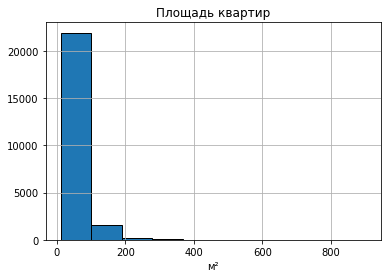

In [24]:
# построил гистрограмму по столбцу total_area
df['total_area'].hist(edgecolor='black');
plt.title('Площадь квартир');
plt.xlabel('м²');

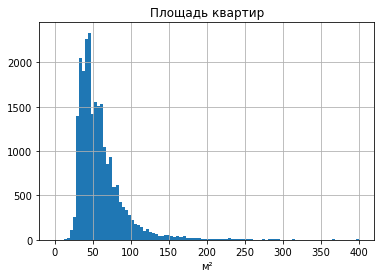

In [25]:
# построил гистрограмму по столбцу total_area, применил параметр bins=100 и параметр range=(0, 400)
df['total_area'].hist(bins=100, range=(0, 400));
plt.title('Площадь квартир');
plt.xlabel('м²');

**Вывод:**

По гистограмме видно, что большинство площадь у квартир вывешена в диапозоне от 40 до 45 квадартных метров и чуть меньше от 30 до 35

In [26]:
# применли метод describe и посмотрел интересующие значения
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [27]:
# сформировал значения столбца last_price в обычный строковой формат с помощью lambda функции и метода format
df['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23699.000000
mean       6541548.771552
std       10887013.267545
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6800000.000000
max      763000000.000000
Name: last_price, dtype: object

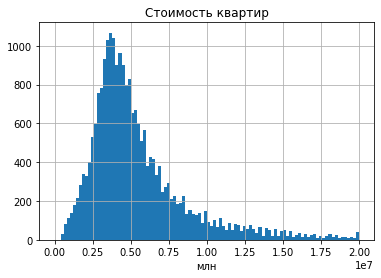

In [28]:
# построил гистрограмму по столбцу last_total, применил параметр bins=100 и параметр range=(0, 20000000)
df['last_price'].hist(bins=100, range=(0, 20000000));
plt.title('Стоимость квартир');
plt.xlabel('млн');

**Вывод:**

По гистограмме видно, что большинство квартир стоят в диапозоне от 3 млн до 4.5 млн рублей

In [29]:
# применли метод describe и посмотрел интересующие значения 
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

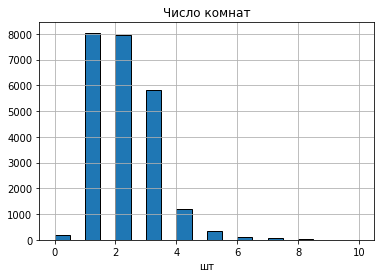

In [30]:
# построил гистрограмму по столбцу rooms, применил параметр bins=20 и параметр range=(0, 10)
df['rooms'].hist(bins=20, range=(0, 10), edgecolor='black');
plt.title('Число комнат');
plt.xlabel('шт');

**Вывод:**

По гистограмме видно, что в квартирах в большинстве случаях имееться по 1 или 2 комнаты, реже 3

In [31]:
# применли метод describe и посмотрел интересующие значения 
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

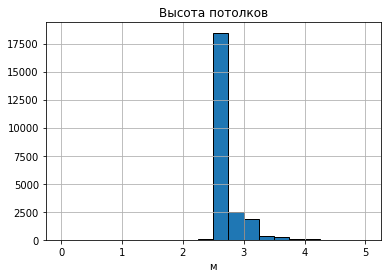

In [32]:
# построил гистрограмму по столбцу ceiling_height, применил параметр bins=20 и параметр range=(0, 5)
df['ceiling_height'].hist(bins=20, range=(0, 5), edgecolor='black');
plt.title('Высота потолков');
plt.xlabel('м');

**Вывод:**

По гистограмме видно, что высота потолка в квартирах базируется в диапозоне от 2.5 до 2.7 метров

In [33]:
# применли метод describe и посмотрел интересующие значения
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [34]:
# нашёл среднее время продажи
days_exposition_mean = df['days_exposition'].mean()
print(f'Среднее время продажи: {int(days_exposition_mean)} дней')

Среднее время продажи: 180 дней


In [35]:
# нашёл медиаоное время продажи
days_exposition_median = df['days_exposition'].median()
print(f'Медианое время продажи: {int(days_exposition_median)} дней')

Медианое время продажи: 95 дней


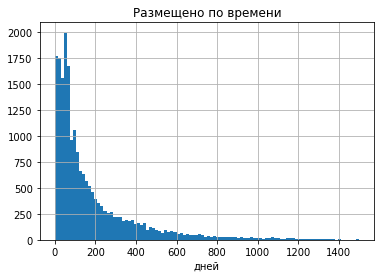

In [36]:
# построил гистрограмму по столбцу days_exposition, применил параметр bins=50 и параметр range=(0, 1500)
df['days_exposition'].hist(bins=100, range=(0, 1500));
plt.title('Размещено по времени');
plt.xlabel('дней');

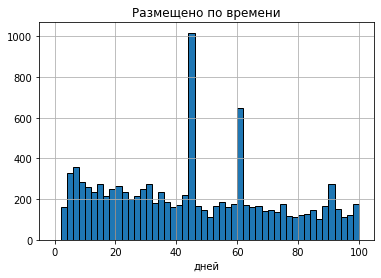

In [37]:
# построил ещё раз гистрограмму по столбцу days_exposition, применил параметр bins=50 и параметр range=(0, 50)
df['days_exposition'].hist(bins=50, range=(0, 100), edgecolor='black');
plt.title('Размещено по времени');
plt.xlabel('дней');

**Вывод:**

По гистограмме видно, что продажа обычно занимает 45 дней. Очень быстрой продажой можно считать, когда квартиры продовалась менее, чем за 45 дней, а необычно долгая продажой болле, чем 1000 дней

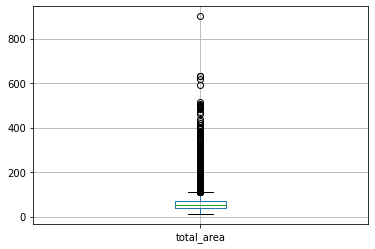

In [38]:
# построил диаграмму размаха по столбку total_area
df.boxplot('total_area');

In [39]:
# сделал срез по столбцу total_area, отбросив ненужные значения
total_area_df = df.query('total_area < 160')

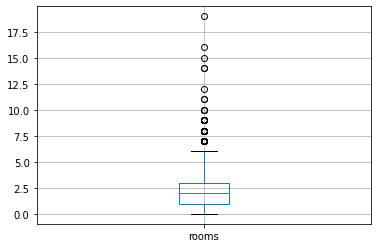

In [40]:
# построил диаграмму размаха по столбку rooms
df.boxplot('rooms');

In [41]:
# сделал срез по столбцу area, отбросив ненужные значения
rooms_df = df.query('rooms < 7')

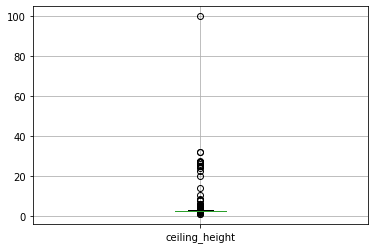

In [42]:
# построил диаграмму размаха по столбку ceiling_height
df.boxplot('ceiling_height');

In [43]:
# сделал срез по столбцу ceiling_height, отбросив ненужные значения
ceiling_height_df = df.query('ceiling_height < 4')

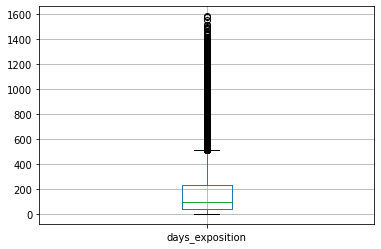

In [44]:
# построил диаграмму размаха по столбку days_exposition
df.boxplot('days_exposition');

In [45]:
# сделал срез по столбцу days_exposition_df, отбросив ненужные значения
days_exposition_df = df.query('days_exposition < 550')

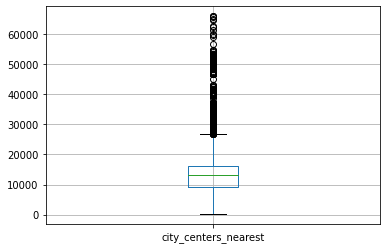

In [46]:
# построил диаграмму размаха по столбку city_centers_nearest
df.boxplot('city_centers_nearest');

In [47]:
# сделал срез по столбцу city_centers_nearest, отбросив ненужные значения
city_centers_nearest_df = df.query('city_centers_nearest < 27000')

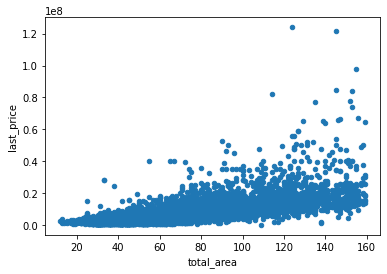

In [48]:
# построил диаграму рассеяния по абсциссе столбца total_area и ординате столбца last_price
total_area_df.plot(x='total_area', y='last_price', kind='scatter');

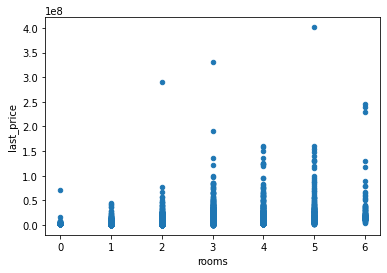

In [49]:
# построил диаграму рассеяния по абсциссе столбца rooms и ординате столбца last_price
rooms_df.plot(x='rooms', y='last_price', kind='scatter');

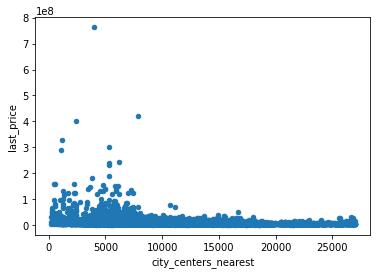

In [50]:
# построил диаграму рассеяния по абсциссе столбца city_centers_nearest и ординате столбца last_price
city_centers_nearest_df.plot(x='city_centers_nearest', y='last_price', kind='scatter');

**Вывод**

По диаграммам видно, что площадь кваритры, число комнат и удалённость от ценра влияет на её стоимость, но неторая недвижимость различается от остальных, как например стоимость квартир около 40 млн и площадью 65 метров. Это связано, что квартира может находиться в центре, но при это иметь меньше площади, чем например на окраине или иметь больше комнат, но стоить меньше. Но удалённость иммет чуть меньше изменений с ценой, так как это один из важнейших показателей цены недвижимости

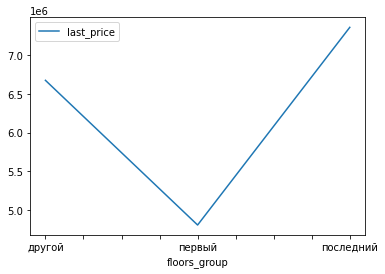

In [51]:
# построил сводную таблицу по индексу столбца floors_group и значению столбца last_price, визау диаграмму
df.pivot_table(index='floors_group', values='last_price').plot();

**Вывод**

По диаграмме видно, что цена зависит от этажа на квартире. На первых этажаж квартиры стоят дешевле, чем на других, а на последнях квартиры стоят всех дороже

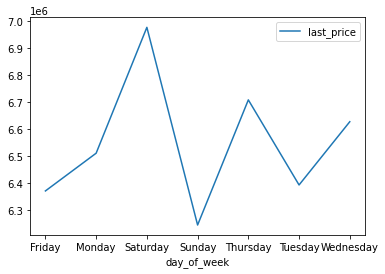

In [52]:
# построил сводную таблицу по индексу столбца day_of_week и значению столбца last_price, построил диаграмму
df.pivot_table(index='day_of_week', values='last_price').plot();

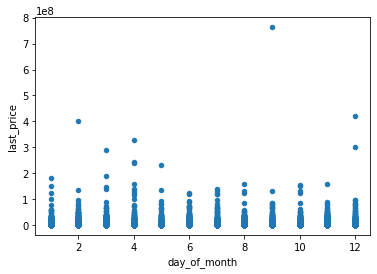

In [53]:
# построил диаграмму рассеяния по абсциссе столбца day_of_month и ординате столбца last_price
df.plot(x='day_of_month', y='last_price', kind='scatter');

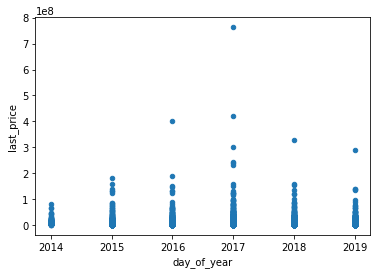

In [54]:
# построил диаграмму рассеяния по абсциссе столбца day_of_year и ординате столбца last_price
df.plot(x='day_of_year', y='last_price', kind='scatter');

**Вывод**

По диаграммам видно, что дата размещения месяца и года почти никак не влияет, есть немного значений, которые выделяются, но это низкий процент, их можно считать аномалиями

In [55]:
# нашёл 10 населённых пунктов с наибольшим числом объявлений
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [56]:
# создал переменную locality_name_10, применил метод query, создал сводную таблицу по индексу столбца locality_name 
# и значению столбца price_per_square_meter, рассчитал среднею цену квадратного метра
locality_name_10 = (
    df
    .query('locality_name in ["Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг"]')
    .pivot_table(index='locality_name', values='price_per_square_meter')
)
locality_name_10.sort_values(by='price_per_square_meter', ascending=False)

,price_per_square_meter
locality_name,
Санкт-Петербург,115347.299472
Пушкин,103610.948509
деревня Кудрово,93001.742475
посёлок Парголово,90675.235474
посёлок Мурино,86379.549808
посёлок Шушары,79068.186364
Колпино,75735.150888
Гатчина,69045.068404
Всеволожск,68984.801508


**Вывод:**

Населённый пункт с самой высокой стоимостью жилья явлется Санкт-Петербург, а c самой маленькой стоимостью жилья Выборг

In [57]:
# дабавил новый столбец city_centers_nearest_s, перевёл метры из столбца city_centers_nearest в километры
df['city_centers_nearest_km'] = city_centers_nearest_df['city_centers_nearest'] // 1000
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,day_of_month,day_of_year,floors_group,living_total_area_ratio,kitchen_total_area_ratio,city_centers_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,120370,Thursday,3,2019,другой,0.472222,0.231481,16.0
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,NaN,81.0,83750,Tuesday,12,2018,первый,0.465000,0.275000,18.0
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,574.0,558.0,92785,Thursday,8,2015,другой,0.612500,0.148214,13.0
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,234.0,424.0,408176,Friday,7,2015,другой,NaN,NaN,6.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,100000,Tuesday,6,2018,другой,0.320000,0.410000,8.0


In [58]:
# создал переменную locality_name_spb и применил метод query к столбцу locality_name, чтобы выделить только город Санкт-Петербург
locality_name_spb = df.query('locality_name == "Санкт-Петербург"')

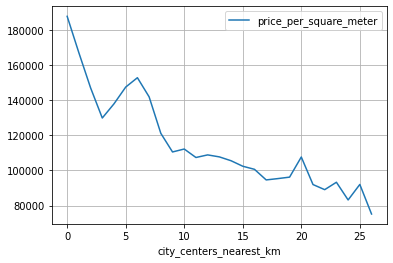

In [59]:
# сооздал сводную таблицу по индексу столбца city_centers_nearest_km и значению столбца price_per_square_meter 
# и построил график на основе данных 
locality_name_spb.pivot_table(index='city_centers_nearest_km', values='price_per_square_meter').plot(grid='True'); 

**Вывод**

График начинается сильно меняться от 6 км до центра города. По графику видно, что чем дальше идёт расстояние от центра города, то средняя цена становится почти везде ниже за исключением расстоянии 20 км. Ещё видна разница на расстояние 4 км, там средняя цена ниже, чем на расстояние 5 км, хотя должна быть выше. Это наталктвает на мысль, что в некотрых случаях средння цена на расстояние в 1 или 2 км не зависит от удалённости от центра

In [60]:
# создал переменную
city_centers_nearest_centre = locality_name_spb.query('city_centers_nearest_km == 0')

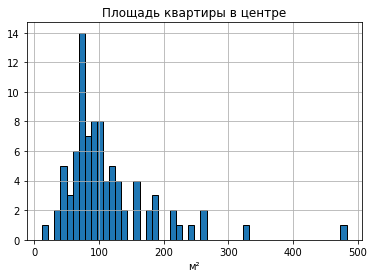

In [61]:
# построил гистрограмму по столбцу total_area, применил параметр bins=50
city_centers_nearest_centre['total_area'].hist(bins=50, edgecolor='black');
plt.title('Площадь квартиры в центре');
plt.xlabel('м²');

**Вывод**

По гистограмме видно, что в центре площадь базирутся от 70 до 100 метров

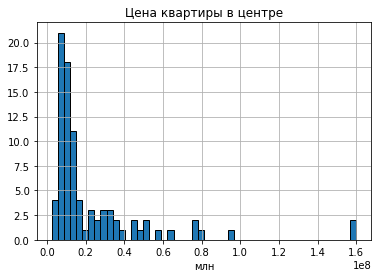

In [62]:
# построил гистрограмму по столбцу last_price, применил параметр bins=50
city_centers_nearest_centre['last_price'].hist(bins=50, edgecolor='black');
plt.title('Цена квартиры в центре');
plt.xlabel('млн');

**Вывод**

По гистограмме видно, что в центре цена базирутся в районе 10 до 15 млн

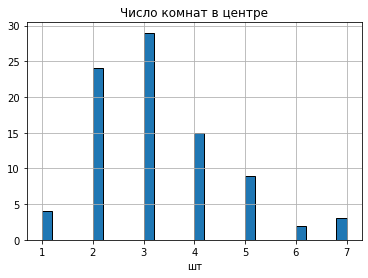

In [63]:
# построил гистрограмму по столбцу rooms, применил параметр bins=30
city_centers_nearest_centre['rooms'].hist(bins=30, edgecolor='black');
plt.title('Число комнат в центре');
plt.xlabel('шт');

**Вывод**

По гистограмме видно, что в центре преобладает кваритры с 3 и 2 двумя комнатами

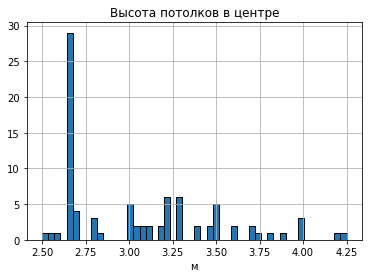

In [64]:
# построил гистрограмму по столбцу ceiling_height, применил параметр bins=50
city_centers_nearest_centre['ceiling_height'].hist(bins=50, edgecolor='black');
plt.title('Высота потолков в центре');
plt.xlabel('м');

**Вывод**

По гистограмме видно, что в центре большинство квартир с высотой потолков 2.65 метра - это медианое значение, которое я применил в начале проэкта

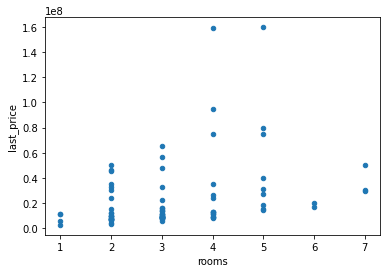

In [65]:
# построил диаграму рассеяния по абсциссе столбца rooms и ординате столбца last_price
city_centers_nearest_centre.plot(x='rooms', y='last_price', kind='scatter');

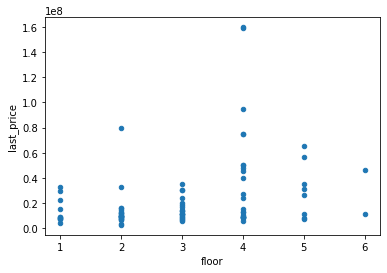

In [66]:
# построил диаграму рассеяния по абсциссе столбца floor и ординате столбца last_price
city_centers_nearest_centre.plot(x='floor', y='last_price', kind='scatter');

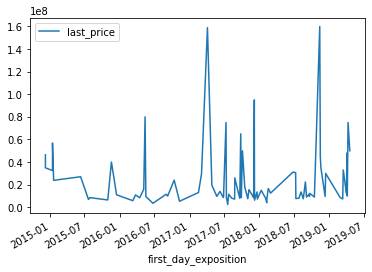

In [67]:
# построил диаграму рассеяния по абсциссе столбца first_day_exposition и ординате столбца last_price
city_centers_nearest_centre.plot(x='first_day_exposition', y='last_price');

**Вывод**

По диаграмме видно, в середине 2017 и конца 2019 года цена была намного больше, чем в остальные периоды. Это может быть связяно с резкой поднятие цены на недвижимость или с мошеннической деятельностью

**Итоговый вывод**

Данные общей базы отличаются только площадью и самой ценой, по другим параметром разница где-то есть, но она не заметна

## Общий вывод

На основе всех полученных данных, можно сказать, что один из решающих факторов цены недвижимости является удалённость от центра города, чем она выше, тем меньше удалённость от центра и наоборт

В данных было замечено много пропущенных значений и за счёт них, нельзя сделать достаточно точный анализ